In [1]:
import os
import sys
sys.path.append("../")
from concerto_function5_3 import *
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
#Select an available GPU to run on a multi-GPU computer or you can run it directly on the CPU without executing this cell
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '5' 
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

In [3]:
path = './data/expBatch1_woGroup2.loom'
adata = sc.read(path)

# preprocess

In [6]:
adata = preprocessing_rna(adata,n_top_features=2000,is_hvg=True,batch_key='Batch')

... storing 'Batch' as categorical
... storing 'Group' as categorical
... storing 'batch' as categorical
/home/CXxie/.conda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Processed dataset shape: (9851, 2000)


In [7]:
save_path = './'
if not os.path.exists(save_path):
    os.makedirs(save_path)
adata.write_h5ad(save_path + 'adata_sim.h5ad')

# make TF-record
TF-record is a binary file containing sequences of serialized byte-strings for the sharding file in TensorFlow, which is especially suitable for streaming data input network.

In [8]:
save_path = './'
if not os.path.exists(save_path):
    os.makedirs(save_path)
sim_tf_path = concerto_make_tfrecord(adata,tf_path = save_path + 'tfrecord/sim_tf/',batch_col_name = 'Batch')

AnnData object with n_obs × n_vars = 9851 × 2000
    obs: 'Batch', 'Cell', 'Discard', 'ExpLibSize', 'Group', 'batch', 'detected', 'sizeFactor', 'sum', 'total', 'n_genes'
    var: 'BaseGeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'BatchFacBatch5', 'BatchFacBatch6', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'DEFacGroup5', 'DEFacGroup6', 'DEFacGroup7', 'GeneMean', 'OutlierFactor', 'detected', 'mean', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
counter: 1000 shape: (2000,), batch: 0
counter: 2000 shape: (2000,), batch: 0
counter: 3000 shape: (2000,), batch: 1
counter: 4000 shape: (2000,), batch: 1
counter: 5000 shape: (2000,), batch: 2
counter: 6000 shape: (2000,), batch: 2
counter: 7000 shape: (2000,), batch: 3
counter: 8000 shape: (2000,), batch: 4
counter: 9000 shape: (2000,), batch: 4


# train 

In [4]:
save_path = './'
weight_path = save_path + 'weight/'
sim_tf_path = save_path + 'tfrecord/sim_tf/'
concerto_train_ref(sim_tf_path,weight_path,super_parameters={'batch_size': 64, 'epoch': 10, 'lr': 1e-6})

./tfrecord/sim_tf/tf_3.tfrecord
Epoch 1, step 5, simclr loss: 9.0934.
Epoch 1, step 10, simclr loss: 9.1458.
Epoch 1, step 15, simclr loss: 9.1444.
Epoch 1, step 20, simclr loss: 9.1788.
./tfrecord/sim_tf/tf_4.tfrecord
Epoch 1, step 5, simclr loss: 9.1027.
Epoch 1, step 10, simclr loss: 9.0522.
Epoch 1, step 15, simclr loss: 9.0654.
Epoch 1, step 20, simclr loss: 9.0390.
Epoch 1, step 25, simclr loss: 9.0552.
./tfrecord/sim_tf/tf_0.tfrecord
Epoch 1, step 5, simclr loss: 8.9884.
Epoch 1, step 10, simclr loss: 8.9891.
Epoch 1, step 15, simclr loss: 8.9775.
Epoch 1, step 20, simclr loss: 8.9625.
Epoch 1, step 25, simclr loss: 8.9659.
Epoch 1, step 30, simclr loss: 8.9547.
Epoch 1, step 35, simclr loss: 8.9624.
Epoch 1, step 40, simclr loss: 8.9679.
./tfrecord/sim_tf/tf_5.tfrecord
Epoch 1, step 5, simclr loss: 9.0877.
./tfrecord/sim_tf/tf_2.tfrecord
Epoch 1, step 5, simclr loss: 8.7983.
Epoch 1, step 10, simclr loss: 8.8559.
Epoch 1, step 15, simclr loss: 8.8427.
Epoch 1, step 20, simclr l

Epoch 7, step 20, simclr loss: 8.1330.
Epoch 7, step 25, simclr loss: 8.1328.
Epoch 7, step 30, simclr loss: 8.1256.
Epoch 7, step 35, simclr loss: 8.1314.
Epoch 7, step 40, simclr loss: 8.1472.
./tfrecord/sim_tf/tf_0.tfrecord
Epoch 8, step 5, simclr loss: 8.2097.
Epoch 8, step 10, simclr loss: 8.2050.
Epoch 8, step 15, simclr loss: 8.1782.
Epoch 8, step 20, simclr loss: 8.1696.
Epoch 8, step 25, simclr loss: 8.1713.
Epoch 8, step 30, simclr loss: 8.1396.
Epoch 8, step 35, simclr loss: 8.1309.
Epoch 8, step 40, simclr loss: 8.1097.
./tfrecord/sim_tf/tf_5.tfrecord
Epoch 8, step 5, simclr loss: 8.2861.
./tfrecord/sim_tf/tf_2.tfrecord
Epoch 8, step 5, simclr loss: 8.2277.
Epoch 8, step 10, simclr loss: 8.1365.
Epoch 8, step 15, simclr loss: 8.1124.
Epoch 8, step 20, simclr loss: 8.1087.
./tfrecord/sim_tf/tf_4.tfrecord
Epoch 8, step 5, simclr loss: 8.1198.
Epoch 8, step 10, simclr loss: 8.1397.
Epoch 8, step 15, simclr loss: 8.1469.
Epoch 8, step 20, simclr loss: 8.1877.
Epoch 8, step 25, 

'./weight/'

# test

In [11]:
save_path = './'
weight_path = save_path + 'weight/'
sim_tf_path = save_path + 'tfrecord/sim_tf/'
saved_weight_path = save_path + 'weight/weight_encoder_epoch4.h5'# You can choose a trained weight or use None to default to the weight of the last epoch.
embedding,sim_id = concerto_test_ref(weight_path,sim_tf_path,super_parameters = {'batch_size': 64, 'epoch': 1, 'lr': 1e-5,'drop_rate': 0.1},saved_weight_path = saved_weight_path)

load saved weight
./tfrecord/sim_tf/tf_2.tfrecord
./tfrecord/sim_tf/tf_0.tfrecord
./tfrecord/sim_tf/tf_4.tfrecord
./tfrecord/sim_tf/tf_5.tfrecord
./tfrecord/sim_tf/tf_1.tfrecord
./tfrecord/sim_tf/tf_3.tfrecord
reference embedding shape (9728, 128)
ref id length 9728


# Plot cell embeddings

In [12]:
adata = sc.read('./adata_sim.h5ad')
adata_1 = adata[sim_id]
adata_1.obsm['X_embedding'] = embedding

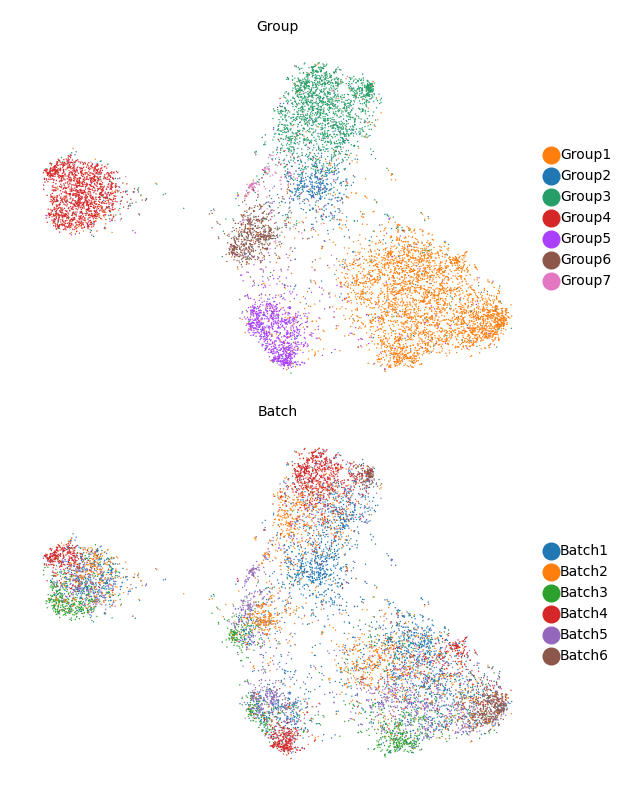

In [15]:
sc.pp.neighbors(adata_1,n_neighbors=15, use_rep='X_embedding')
sc.tl.umap(adata_1,min_dist =0.001)

import matplotlib.style as style
style.use('ggplot')
sc.settings.set_figure_params(dpi=200, facecolor='white',frameon=False,fontsize=5.5)

plt.rcParams.update({
    'svg.fonttype':'none',
    "font.size":5.5,
    'axes.labelsize': 5.5,
    'axes.titlesize':5,
    'legend.fontsize': 5,
    'ytick.labelsize':5,
    'xtick.labelsize':5,
})
adata_1.uns['Group_colors'] = ['#ff7f0e','#1f77b4', '#279e68', '#d62728', '#aa40fc', '#8c564b','#e377c2']
cm = 1/2.54
fig, axes = plt.subplots(2, 1,figsize=(8*cm,10*cm))
sc.pl.umap(adata_1, color=['Group'], show=False, ax=axes[0], size=1)
sc.pl.umap(adata_1, color=['Batch'], show=False, ax=axes[1], size=1)
fig.tight_layout()